In [4]:
import pandas as pd

df = pd.read_csv("spotify_small.csv")
df.head(8)

,track_name,artist_name,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Blinding Lights,The Weeknd,0.525,0.918,0.115,0.543,0.078,0.105,0.149,148.62
1,Levitating,Dua Lipa,0.661,0.760,0.023,0.873,0.416,0.124,0.255,90.59
2,Save Your Tears,The Weeknd,0.483,0.641,0.076,0.269,0.306,0.099,0.348,106.14
3,Don't Start Now,Dua Lipa,0.574,0.810,0.046,0.468,0.296,0.066,0.616,89.49
4,Watermelon Sugar,Harry Styles,0.339,0.917,0.146,0.729,0.152,0.084,0.682,112.41
5,bad guy,Billie Eilish,0.373,0.622,0.024,0.819,0.129,0.282,0.365,119.21
6,Circles,Post Malone,0.628,0.420,0.146,0.700,0.470,0.363,0.608,153.36
7,drivers license,Olivia Rodrigo,0.353,0.427,0.026,0.300,0.194,0.145,0.804,105.32


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        30 non-null     object 
 1   artist_name       30 non-null     object 
 2   danceability      30 non-null     float64
 3   energy            30 non-null     float64
 4   speechiness       30 non-null     float64
 5   acousticness      30 non-null     float64
 6   instrumentalness  30 non-null     float64
 7   liveness          30 non-null     float64
 8   valence           30 non-null     float64
 9   tempo             30 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.5+ KB


In [6]:
df.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.555833,0.646633,0.082233,0.497567,0.239733,0.180133,0.562133,114.088667
std,0.182555,0.165333,0.041477,0.266494,0.145427,0.103256,0.249164,22.377329
min,0.303000,0.324000,0.023000,0.025000,0.016000,0.053000,0.149000,84.850000
25%,0.404000,0.557750,0.045250,0.276750,0.117750,0.100500,0.352250,92.710000
50%,0.523000,0.647000,0.075000,0.523500,0.260500,0.141500,0.632000,109.335000
75%,0.679000,0.759250,0.111000,0.718000,0.356250,0.265500,0.771000,130.847500
max,0.858000,0.918000,0.148000,0.875000,0.481000,0.395000,0.901000,153.360000


In [17]:
features = [
    "danceability", "energy", "speechiness", "acousticness",
    "instrumentalness", "liveness","valence", "tempo" 
    ]

x = df[features].values


from sklearn.processing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
X_scaled[:5]

ModuleNotFoundError: No module named 'sklearn.processing'

In [16]:
from sklearn.preprocessing import MinMaxScaler
print("Scikit-learn funcionando!")


Scikit-learn funcionando!


In [2]:
features = [
    "danceability", "energy", "speechiness", "acousticness",
    "instrumentalness", "liveness","valence", "tempo" 
    ]

x = df[features].values


from sklearn.processing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
X_scaled[:5]

NameError: name 'df' is not defined

In [3]:
# Selecionar as colunas que representam as características da música
features = [
    "danceability", "energy", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "tempo"
]


X = df[features].values


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_scaled[:5]


NameError: name 'df' is not defined

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(X_scaled)
similarity_matrix[:5:5]

NameError: name 'X_scaled' is not defined

In [34]:
def recomendar_musicas(nome_musica, df, matrix, n=5):
    if nome_musica not in df['track_name'].values:
        return "Música não encontrada no dataset."
    
    index = df[df['track_name'] == nome_musica].index[0]
    similaridades = list(enumerate(matrix[index]))
    similaridades = sorted(similaridades, key=lambda x: x[1], reverse=True)[1:n+1]

    recomendacoes = df.iloc[[i[0] for i in similaridades]][["track_name", "artist_name"]]
    return recomendacoes

In [36]:
recomendar_musicas("Happier", df, similarity_matrix)


,track_name,artist_name
28,Break My Heart,Dua Lipa
17,Kiss Me More,Doja Cat
7,drivers license,Olivia Rodrigo
9,Stay,The Kid LAROI & Justin Bieber
6,Circles,Post Malone


In [10]:
def recomendar_musicas(nome_musica, df, matrix, n=5):
    df['track_name_lower'] = df['track_name'].str.lower()

    nome_musica_lower = nome_musica.lower()

    if nome_musica_lower not in df['track_name_lower'].values:
        return "Música não encontrada no dataset."
    
    index = df[df['track_name_lower']== nome_musica_lower].index[0]
    similaridades = list(enumerate(matrix[index]))
    similaridades = sorted(similaridades, key=lambda x: x[1], reverse=True)[1:n+1]
                                                                            
    recomendacoes = df.iloc[[i[0] for i in similaridades]][["track_name", "artist_name"]]  
      
    df.drop(columns=['track_name_lower'], inplace=True) 

    return recomendacoes                                                                                                                                                                                                                                                   

In [14]:
recomendar_musicas("Shape of You", df, similarity_matrix)
recomendar_musicas("shape of you", df, similarity_matrix)
recomendar_musicas("SHAPE OF YOU", df, similarity_matrix)



NameError: name 'similarity_matrix' is not defined

In [7]:
import pandas as pd

df = pd.read_csv("spotify_small.csv")

df.tail(10)

,track_name,artist_name,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
20,Heat Waves,Glass Animals,0.521,0.711,0.102,0.487,0.045,0.342,0.373,90.85
21,Montero,Lil Nas X,0.324,0.684,0.108,0.025,0.256,0.129,0.648,89.82
22,Industry Baby,Lil Nas X,0.715,0.551,0.142,0.132,0.171,0.090,0.886,149.57
23,Someone You Loved,Lewis Capaldi,0.455,0.729,0.126,0.504,0.265,0.135,0.179,151.26
24,Perfect,Ed Sheeran,0.840,0.712,0.064,0.321,0.363,0.364,0.854,141.29
25,Lovely,Billie Eilish,0.685,0.355,0.041,0.810,0.303,0.053,0.186,131.40
26,Happier,Marshmello,0.303,0.405,0.091,0.626,0.326,0.128,0.705,95.17
27,Senorita,Shawn Mendes & Camila Cabello,0.495,0.785,0.104,0.766,0.329,0.249,0.180,106.26
28,Break My Heart,Dua Lipa,0.459,0.459,0.146,0.360,0.446,0.271,0.776,117.72
29,Stressed Out,Twenty One Pilots,0.646,0.620,0.045,0.653,0.140,0.059,0.649,90.05


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Selecione as colunas numéricas que representam características das músicas
features = ["danceability", "energy", "speechiness", "acousticness", 
            "instrumentalness", "liveness", "valence", "tempo"]

x = df[features].values

# Normaliza os valores entre 0 e 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

# Cria a matriz de similaridade com base na similaridade do cosseno
similarity_matrix = cosine_similarity(X_scaled)


In [18]:
recs = recomendar_musicas("drivers license", df, similarity_matrix)
recs


,track_name,artist_name
16,Adore You,Harry Styles
26,Happier,Marshmello
11,Therefore I Am,Billie Eilish
24,Perfect,Ed Sheeran
18,Say So,Doja Cat


In [24]:
import plotly.express as px

def plot_recomendacoes(nome_musica, df, matrix, n=10):
    recs = recomendar_musicas(nome_musica, df, matrix, n)
    fig = px.bar(
        recs,
        x = "similaridade (%)",
        y ="track_name",
        orientation='h',
        text ="artist_name",
        color ="similaridade (%)",
        title = f"Top {n} músicas parecidas com '{nome_musica}",
        color_continuous_scale="viridis"
    ) 
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    fig.show()

    plot_recomendacoes("drivers license", df, similarity_matrix)
    

In [32]:
def recomendar_por_humor(df, humor="feliz", n=5):
    df = df.copy()
    
    # Criar pontuações ponderadas
    df["score_feliz"] = df["valence"]*0.5 + df["energy"]*0.3 + df["danceability"]*0.2
    df["score_triste"] = (1 - df["valence"])*0.5 + (1 - df["energy"])*0.3 + (1 - df["danceability"])*0.2
    df["score_calmo"] = (1 - df["energy"])*0.4 + df["acousticness"]*0.4 + (1 - df["tempo"]/df["tempo"].max())*0.2
    df["score_animado"] = df["energy"]*0.4 + df["danceability"]*0.4 + df["tempo"]/df["tempo"].max()*0.2

    if humor == "feliz":
        df_sorted = df.sort_values("score_feliz", ascending=False)
    elif humor == "triste":
        df_sorted = df.sort_values("score_triste", ascending=False)
    elif humor == "calmo":
        df_sorted = df.sort_values("score_calmo", ascending=False)
    elif humor == "animado":
        df_sorted = df.sort_values("score_animado", ascending=False)
    else:
        return "Humor não reconhecido."
    
    return df_sorted[["track_name", "artist_name"]].head(n)


In [34]:
recomendar_por_humor(df, "triste")


,track_name,artist_name
25,Lovely,Billie Eilish
23,Someone You Loved,Lewis Capaldi
19,Shivers,Ed Sheeran
27,Senorita,Shawn Mendes & Camila Cabello
5,bad guy,Billie Eilish


In [47]:
def comparar_musicas(nome_musica, recomendacao, df):
    features = ["danceability", "energy", "speechiness", "acousticness",
                "instrumentalness", "liveness", "valence", "tempo"]

    musica_base = df[df["track_name"].str.lower() == nome_musica.lower()].iloc[0]
    musica_comp = df[df["track_name"].str.lower() == recomendacao.lower()].iloc[0]

    valores_base = musica_base[features].values
    valores_comp = musica_comp[features].values

    labels = np.array(features)
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    valores_base = np.concatenate((valores_base, [valores_base[0]]))
    valores_comp = np.concatenate((valores_comp, [valores_comp[0]]))
    angles += angles[:1]

    plt.figure(figsize=(6,6))
    plt.polar(angles, valores_base, 'o-', label=musica_base["track_name"], linewidth=2)
    plt.polar(angles, valores_comp, 'o-', label=musica_comp["track_name"], linewidth=2)
    plt.fill(angles, valores_base, alpha=0.25)
    plt.fill(angles, valores_comp, alpha=0.25)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.1))
    plt.title("Comparação entre músicas")
    plt.show()

          

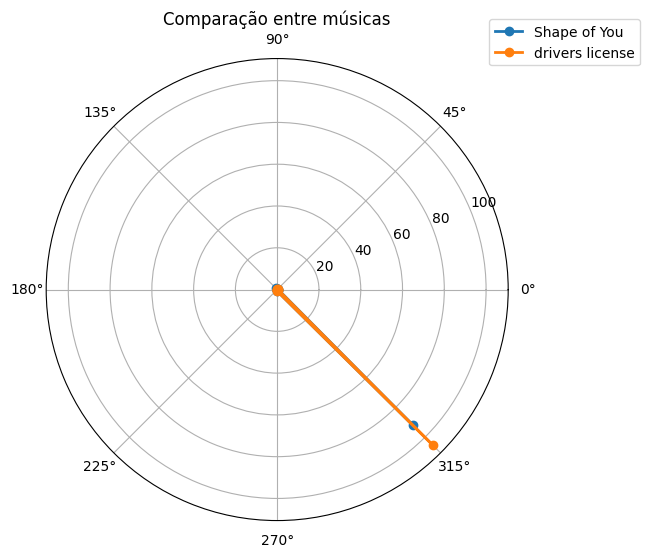

In [48]:
comparar_musicas("Shape of You", "Drivers License", df)


In [6]:
import pandas as pd

df = pd.read_csv("spotify_small.csv")
df.columns

Index(['track_name', 'artist_name', 'danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')